<a href="https://colab.research.google.com/github/eason489233/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_%EF%BC%8301_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
df_train=pd.read_csv(url)


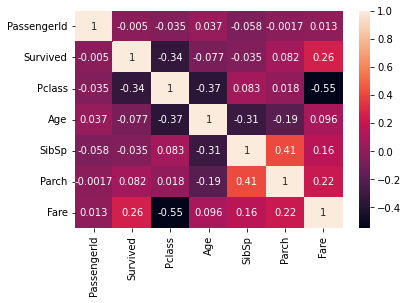

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.DataFrame(df_train)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# plt.matshow(train_X.corr())
# plt.show()

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

In [ ]:
train_X.isna().any()

Ticket         False
PassengerId    False
Embarked        True
Sex            False
Pclass         False
Age             True
Fare           False
Name           False
Cabin           True
SibSp          False
Parch          False
dtype: bool

In [ ]:
#train_X['Age'].fillna(value=df['Age'].mean(),inplace=True)
#train_X=train_X.drop(['Sex'],axis=1) 可以刪除在age上 有缺失值的資料

In [ ]:
train_X=train_X.drop(['Name','Cabin','Embarked','Ticket','Age'],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_X['sex_new'] = le.fit_transform(train_X['Sex'])

In [ ]:
train_X=train_X.drop(['Sex'],axis=1)

In [ ]:
log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.81005587, 0.80337079, 0.78089888, 0.76966292, 0.80898876])